## ROC Curve On Binary Classification

### 1.Implementation

In [1]:
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
# calculate roc curve
def calculate_roc_curve(Y_gt,  Y_score, pos_label, thresh_range):
    """
    Args:
        Y_gt, list: contains all grouth-truth values
        Y_score, list: contains all predicted values
        predictor, object: predictor to predict estimated value
        pos_label, int: positive label 
        thresh_range: threshold range to estimate ROC curve
    """
    tprs = []
    fpss = []
    negative_label = 0
    if pos_label == 0:
        negative_label = 1
    for thresh in thresh_range:
#         Y_pr = predictor.predict(X, thresh)*1
        Y_pr = np.array([(x > thresh) * 1 for x in Y_score])
        TP = np.sum((Y_gt[np.where((Y_gt == Y_pr))] == pos_label)*1)
        FP = np.sum((Y_pr[np.where((Y_gt != Y_pr))] == pos_label)*1)
        TN = np.sum((Y_gt[np.where((Y_gt == Y_pr))] == negative_label)*1)
        FN = np.sum((Y_pr[np.where((Y_gt != Y_pr))] == negative_label)*1)
        
        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
        fpr = FP / (FP + TN) if (FP + FN) > 0 else 0
    
        tprs.append(tpr)
        fpss.append(fpr)
    
    roc_auc = auc(fpss, tprs)
        
    return tprs, fpss, roc_auc

### 2.Calculation and Visualization ROC Curve

In [3]:
# Fake data
ground_truth = np.concatenate((np.zeros(40), np.ones(40)))
ground_truth.shape
prediction = [0.6290588, 0.8490912, 0.6983919, 0.79054403, 0.6025884, 0.8076991, 0.6584846, 2.1959941, 0.6338208, 0.7845179, 2.3805697, 0.7854228, 0.59856606, 0.5896387, 0.6862094, 0.64240676, 0.77792734, 0.8836477, 1.4023622, 0.64413047, 0.6903986, 0.74162376, 0.7497444, 0.743689, 0.7204919, 1.0584579, 0.8856341, 0.8881404, 1.1582506, 0.60460985, 0.65499586, 0.6610615, 0.62392896, 0.62539184, 0.9552798, 0.5398036, 0.75790083, 0.8301346, 0.92223495, 1.5610106, 3.3034, 3.346456, 3.85864, 2.309309, 3.329964, 1.3942356, 3.7773, 2.1770694, 3.79294, 1.344507, 3.461, 3.1072044, 2.0040565, 71.8446, 6.1007843, 1.4495988, 3.5176, 3.273527, 3.433, 3.31328, 2.2577758, 3.74213, 1.7506913, 3.4011, 3.838005, 3.11, 1.7800198, 3.0901973, 3.2716215, 3.710287, 3.97, 1.624124, 2.3545966, 1.6721141, 1.4456981, 1.6071165, 3.867, 1.122522, 3.6929338, 2.8044868]

In [4]:
# Calclation
tprs_dl, fprs_dl, roc_auc_dl = calculate_roc_curve(ground_truth, prediction, pos_label=1, 
                                         thresh_range=np.linspace(0, 10, 1000))

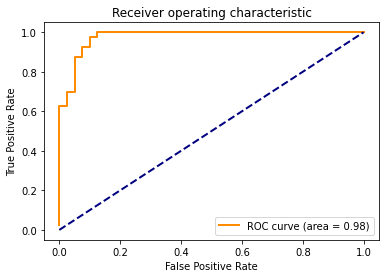

In [5]:
dif = plt.figure()
lw = 2
plt.plot(fprs_dl, tprs_dl, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_dl)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
dif.savefig('ROC_dif.png')
plt.close()

## F1 Score

In [6]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

In [ ]:
# Both groundtruh, prediction lists are binary list like [0,1,0,1,0,0]
con_mat = confusion_matrix(ground_truth,prediction, labels=[0, 1])
con_df = pd.DataFrame(con_mat, index=['OK', 'NG'], columns=['OK', 'NG'])

sn.heatmap(con_df, annot=True)